<a href="https://colab.research.google.com/github/4GeeksAcademy/Wiston_Travieso-Decision-tree/blob/main/src/exploratory-data-analysis.es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


## Análisis exploratorio de datos

### Paso 1: Planteamiento del problema y recopilación de datos

Importaremos el conjunto de datos para comenzar a trabajar con él:

In [21]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"

In [22]:
total_data = pd.read_csv(url, sep=",")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Paso 2: Exploración y limpieza de datos

In [23]:
# Obtener las dimensiones
total_data.shape

(768, 9)

In [24]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# Eliminar duplicados
total_data.duplicated().sum()

np.int64(0)

In [26]:
total_data = total_data.drop_duplicates().reset_index(drop=True)
print(total_data.shape)
total_data.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
numericals = total_data.select_dtypes(include='number').columns
numericals

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


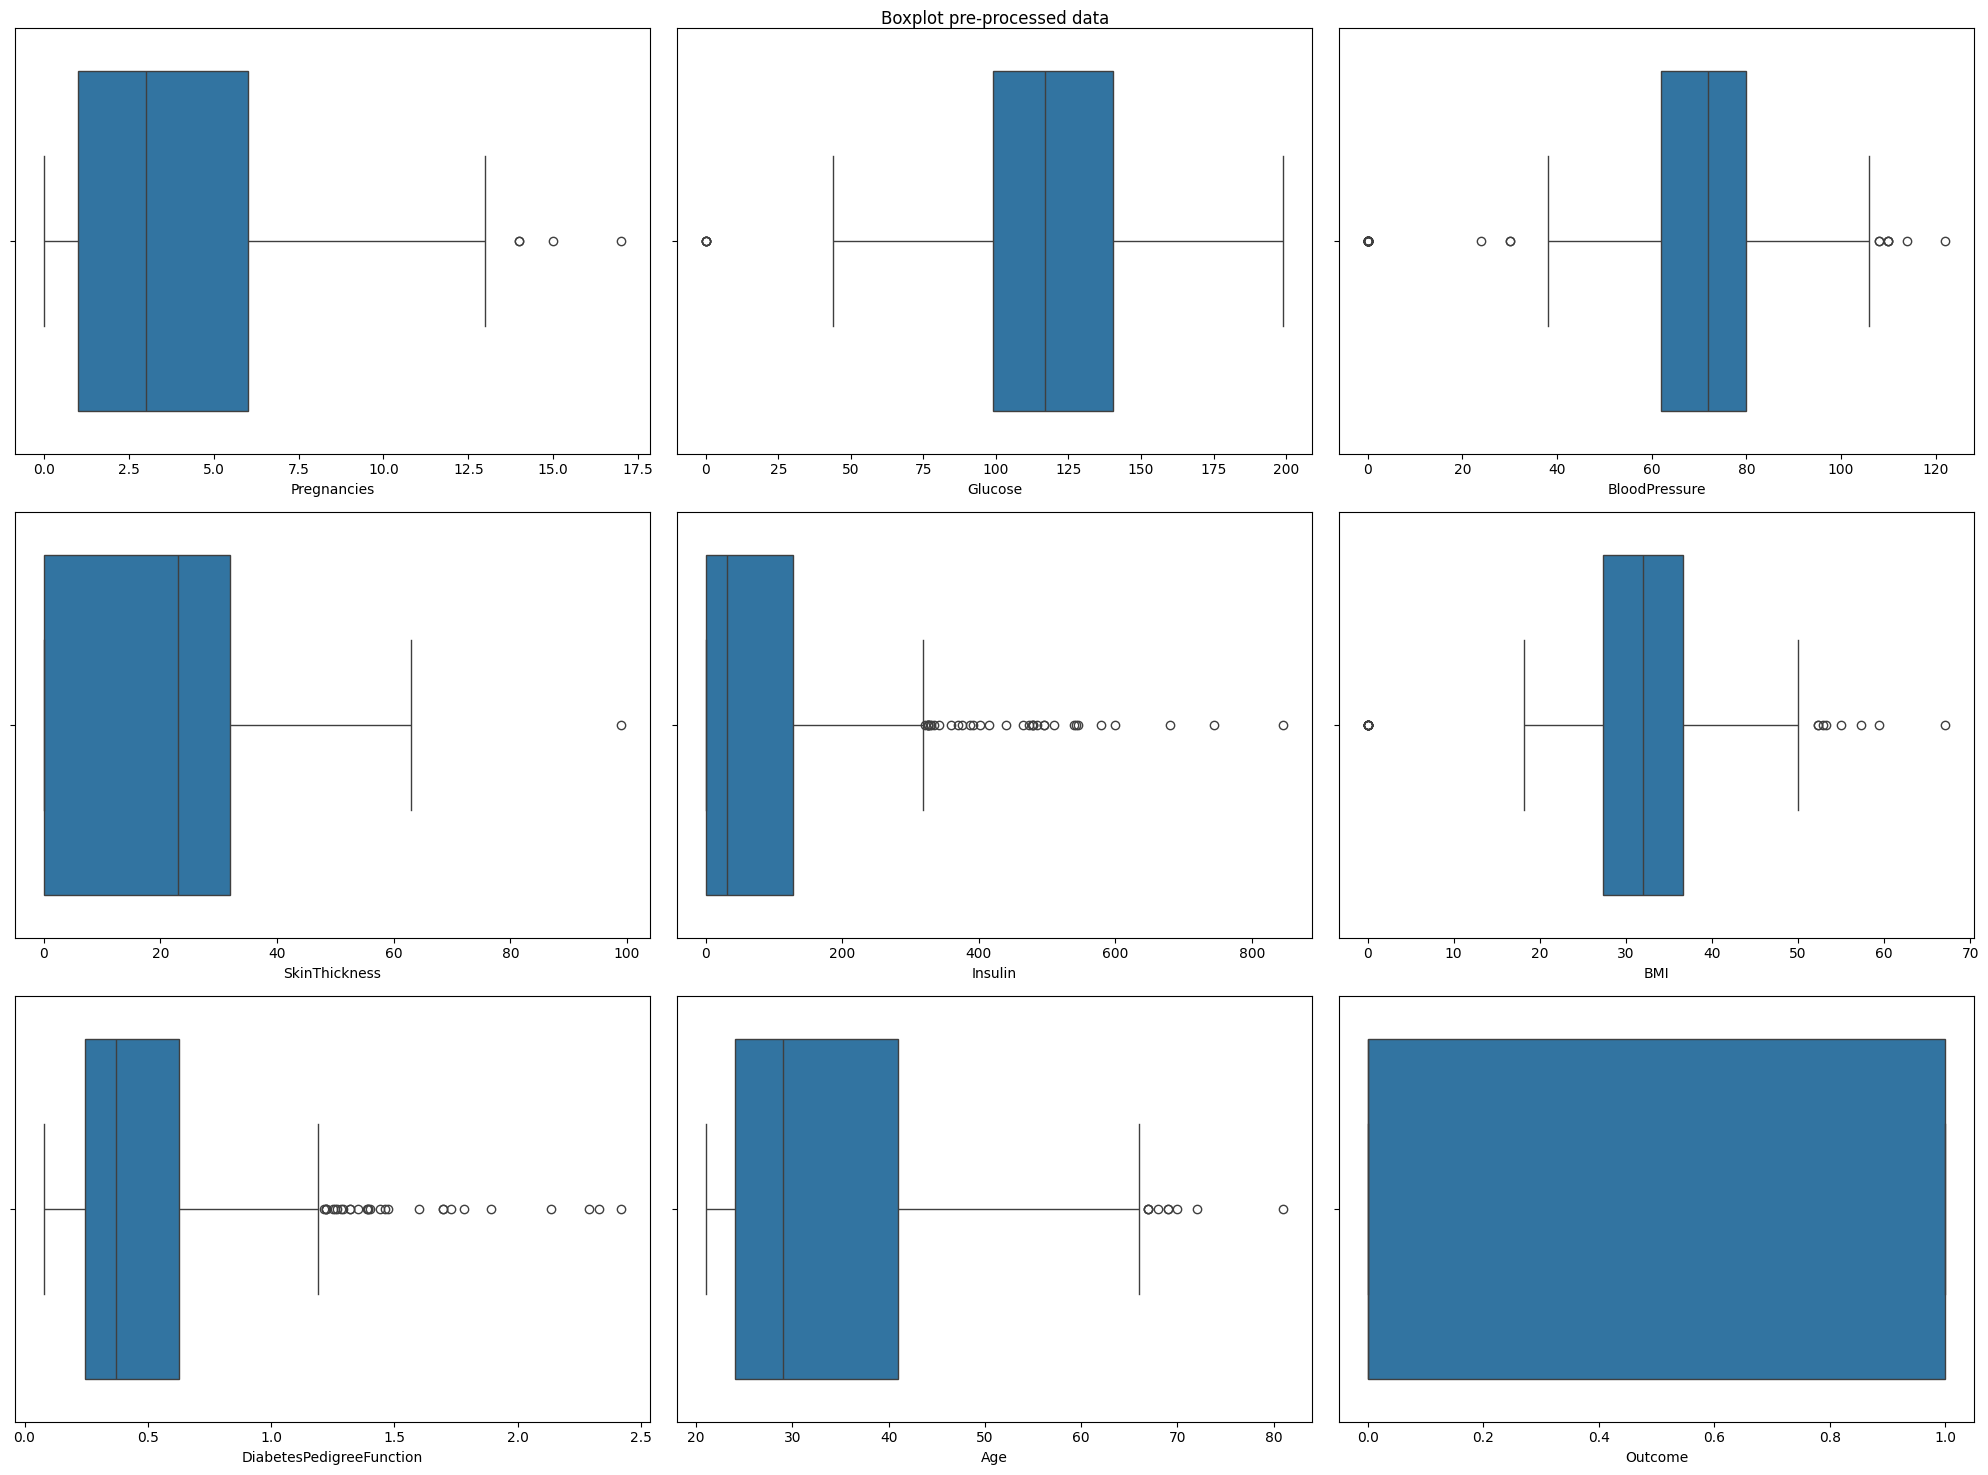

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Visualize all column names in dataframe
column_list    = total_data.columns.tolist()
for column_name in column_list:
    print(column_name)

# Get outliers
fig, axis = plt.subplots(3,3,figsize=(20,15))
r = 0
c = 0
for col_idx in np.arange(0,len(column_list)):
    sn.boxplot(ax=axis[r,c], data = total_data, x = total_data.columns[col_idx])
    c += 1
    if c > 2:
        r += 1
        c = 0

plt.suptitle('Boxplot pre-processed data')
plt.tight_layout()
plt.show()

In [29]:
## Eliminar información irrelevante


total_data = total_data[total_data['Insulin'] <= 400]
total_data = total_data[total_data['DiabetesPedigreeFunction'] <= 1.3]

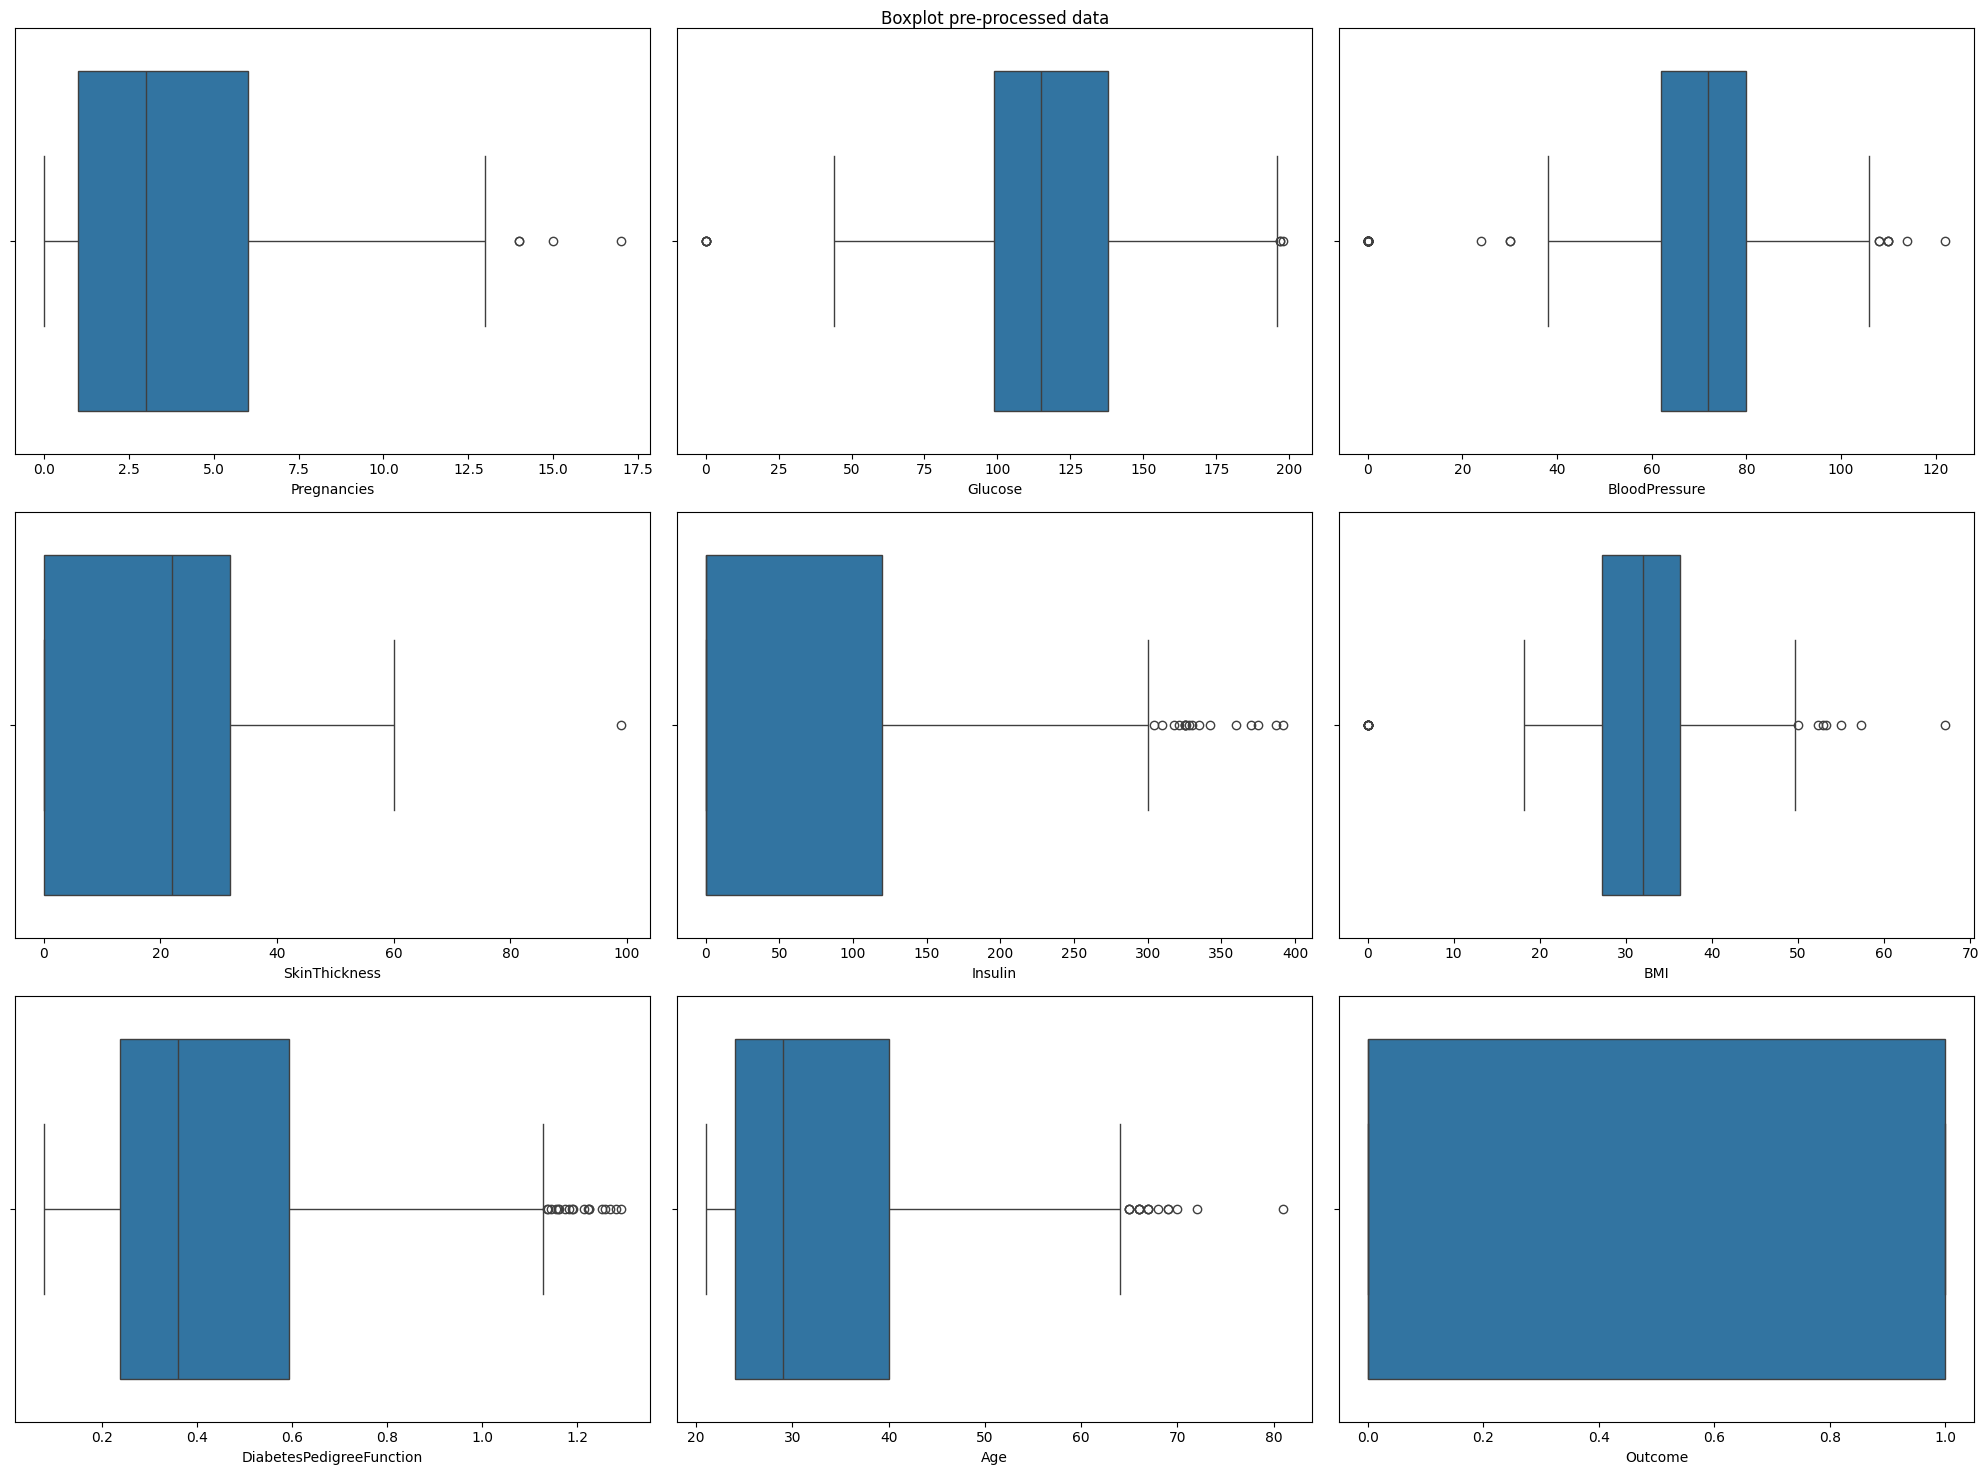

In [30]:
# Get outliers
fig, axis = plt.subplots(3,3,figsize=(20,15))
r = 0
c = 0
for col_idx in np.arange(0,len(column_list)):
    sn.boxplot(ax=axis[r,c], data = total_data_processed, x = total_data_processed.columns[col_idx])
    c += 1
    if c > 2:
        r += 1
        c = 0

plt.suptitle('Boxplot pre-processed data')
plt.tight_layout()
plt.show()

Paso 3: Análisis de variables

In [33]:
# Análisis de correlaciones

corr_matrix = total_data.corr()

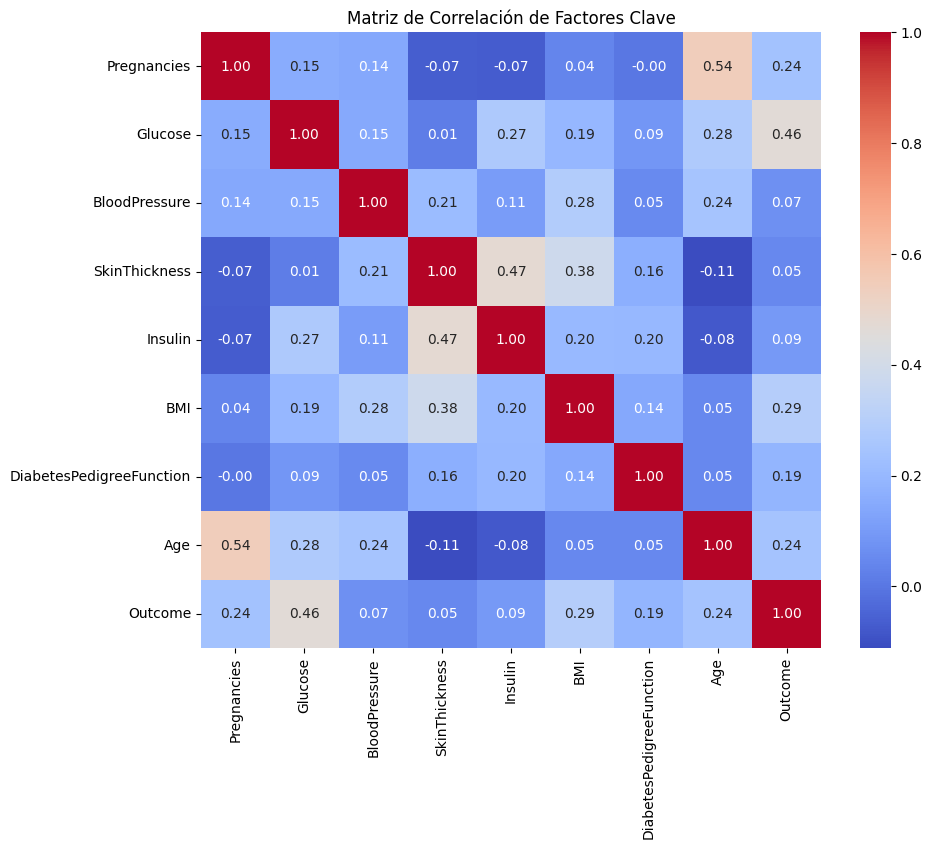

In [34]:
# # Visualización del Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Factores Clave')
plt.show()

In [36]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               730 non-null    int64  
 1   Glucose                   730 non-null    int64  
 2   BloodPressure             730 non-null    int64  
 3   SkinThickness             730 non-null    int64  
 4   Insulin                   730 non-null    int64  
 5   BMI                       730 non-null    float64
 6   DiabetesPedigreeFunction  730 non-null    float64
 7   Age                       730 non-null    int64  
 8   Outcome                   730 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.0 KB


In [37]:
total_data.isnull().sum().sort_values(ascending=False)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Selección de características

In [43]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis=1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(k=7)
selection_model.fit(X_train, y_train)

selected_features = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_features)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_features)

X_train_sel.head()

#

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,96.0,74.0,67.0,33.6,0.997,43.0
1,1.0,125.0,50.0,167.0,33.3,0.962,28.0
2,1.0,102.0,74.0,0.0,39.5,0.293,42.0
3,8.0,120.0,0.0,0.0,30.0,0.183,38.0
4,4.0,154.0,62.0,284.0,32.8,0.237,23.0


In [44]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,81.0,72.0,76.0,30.1,0.547,25.0
1,2.0,88.0,74.0,53.0,29.0,0.229,22.0
2,0.0,124.0,70.0,0.0,27.4,0.254,36.0
3,4.0,156.0,75.0,0.0,48.3,0.238,32.0
4,1.0,88.0,78.0,76.0,32.0,0.365,29.0


In [ ]:
X_train_sel['Outcome'] = y_train.values
X_test_sel['Outcome'] = y_test.values

X_train_sel.to_csv('../data/processed/clean_train.csv', index=False)
X_test_sel.to_csv('../data/processed/clean_test.csv', index=False)
